In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot
import numpy as np
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import keras
from keras.layers import *

Using TensorFlow backend.
/home/ale/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ale/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ale/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ale/.local/lib/python3.6/site-packages/tensorflow/python/framework/d

In [3]:
from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images() 

/home/ale/ICDSS_Challenges/computer-vision/reader.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
/home/ale/ICDSS_Challenges/computer-vision/reader.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = df_train['label'].as_matrix().astype(np.uint8)
/home/ale/ICDSS_Challenges/computer-vision/reader.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
/home/ale/ICDSS_Challenges/computer-vision/reader.py:41: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = df_test['label'].as_matrix().astype(np.uint8)


[[ 0  0  0  0 ...  0  0  0  0]
 [ 0  0  0  1 ...  0  0  0  0]
 [ 0  0  0  0 ...  0  0  0  0]
 [ 0  0  0  0 ... 41  0  0  0]
 ...
 [ 0  0  0  0 ...  0  0  0  0]
 [ 0  0  0  0 ...  0  0  0  0]
 [ 0  0  0  0 ...  0  0  0  0]
 [ 0  0  0  0 ...  0  0  0  0]]
(28, 28)


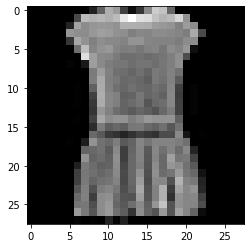

In [4]:
x_train = x_train.reshape(len(x_train),28,28)
x_test = x_test.reshape(len(x_test),28,28)
print(x_train[1])
img = x_train[3]
print(img.shape)
pyplot.imshow(img, cmap='gray')

In [5]:
train_classCount = np.zeros(10)
for y in y_train:
    train_classCount[y] += 1
print("Classes distribution in training set:", train_classCount, sep="\t")

test_classCount = np.zeros(10)
for y in y_test:
    test_classCount[y] += 1
print("Classes distribution in test set:", test_classCount, sep="\t")

Classes distribution in training set:	[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]
Classes distribution in test set:	[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [6]:
# PREPARE DATA FOR TRAINING WITH VGG (32x32)

def resize(array_in, shape=(32,32)):
    out = np.zeros((len(array_in),32,32), dtype=np.int32)
    for i in range(len(array_in)):
        pic = array_in[i]
        out[i][:pic.shape[0], :pic.shape[1]] = pic
    return out.reshape(len(out),32,32,1)


xtrain = resize(x_train)
xtest = resize(x_test)

num_classes = 10
ytrain = keras.utils.to_categorical(y_train, num_classes)
ytest = keras.utils.to_categorical(y_test, num_classes)

Training...
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


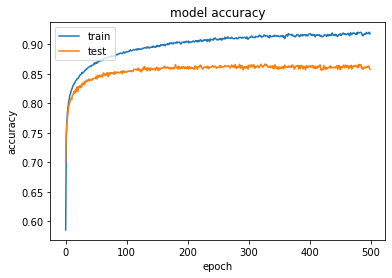

In [11]:
# TRAIN MODEL
# model = keras.applications.vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(32,32,1), pooling=None, classes=10)

model = keras.models.Sequential()
model.add(Dense(125, input_shape=(32*32,), activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

# model = keras.applications.mobilenet_v2.MobileNetV2(input_shape=(32,32,1), alpha=1.0, include_top=True, weights=None, input_tensor=None, pooling=None, classes=10)
model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

# print(model.summary())

print("Training...")

history = model.fit(xtrain.reshape(len(xtrain),32*32), ytrain,
        validation_data=(xtest.reshape(len(xtest),32*32), ytest),  
        batch_size = 600,
        epochs =500,
        verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
score = model.evaluate(xtest.reshape(len(xtest),32*32), ytest)
print(f"Test loss:\t{score[0]}")
print(f"Test accuracy:\t{score[1]*100}%")

10000/10000 [==============================] - 1s 70us/step
Test loss:	0.40202469182014466
Test accuracy:	85.75000166893005%


In [9]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    # Arguments
        x: Input data. It could be:
            - A Numpy array (or array-like), or a list of arrays
              (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding
              array/tensors, if the model has named inputs.
            - A generator or `keras.utils.Sequence` returning
              `(inputs, targets)` or `(inputs, targets, sample weights)`.
            - None (default) if feeding from framework-native
